In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [18]:
df = pd.read_csv('/kaggle/input/chess-com-2022/gm_games_2022.csv')


/tmp/ipykernel_33/815335007.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/chess-com-2022/gm_games_2022.csv')


In [ ]:
#understanding the data

In [19]:
df.head()

,Unnamed: 0,game_id,game_url,pgn,time_control,end_time,rated,time_class,rules,gm_username,white_username,white_rating,white_result,black_username,black_rating,black_result
0,0,https://www.chess.com/game/live/34762832595,https://www.chess.com/game/live/34762832595,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",900+5,2022-01-01 08:39:26,True,rapid,chess,123lt,123lt,2506,agreed,Juwen,2515,agreed
1,1,https://www.chess.com/game/live/34842040547,https://www.chess.com/game/live/34842040547,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",900+5,2022-01-02 06:39:16,True,rapid,chess,123lt,jinbojinbo,2358,repetition,123lt,2498,repetition
2,2,https://www.chess.com/game/live/34845639495,https://www.chess.com/game/live/34845639495,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",900+5,2022-01-02 07:37:33,True,rapid,chess,123lt,Juwen,2536,win,123lt,2480,resigned
3,3,https://www.chess.com/game/live/34849246827,https://www.chess.com/game/live/34849246827,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",900+5,2022-01-02 08:30:47,True,rapid,chess,123lt,123lt,2505,win,daika91,2586,resigned
4,4,https://www.chess.com/game/live/52834844739,https://www.chess.com/game/live/52834844739,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",600,2022-07-29 12:19:07,True,rapid,chess,123lt,stevis5,2155,checkmated,123lt,2514,win


In [20]:
df.shape

(754429, 16)

In [21]:
df.columns

Index(['Unnamed: 0', 'game_id', 'game_url', 'pgn', 'time_control', 'end_time',
       'rated', 'time_class', 'rules', 'gm_username', 'white_username',
       'white_rating', 'white_result', 'black_username', 'black_rating',
       'black_result'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754429 entries, 0 to 754428
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      754429 non-null  int64 
 1   game_id         754429 non-null  object
 2   game_url        754429 non-null  object
 3   pgn             737566 non-null  object
 4   time_control    754429 non-null  object
 5   end_time        754429 non-null  object
 6   rated           754429 non-null  bool  
 7   time_class      754429 non-null  object
 8   rules           754429 non-null  object
 9   gm_username     754429 non-null  object
 10  white_username  754429 non-null  object
 11  white_rating    754429 non-null  int64 
 12  white_result    754429 non-null  object
 13  black_username  754429 non-null  object
 14  black_rating    754429 non-null  int64 
 15  black_result    754429 non-null  object
dtypes: bool(1), int64(3), object(12)
memory usage: 87.1+ MB


In [25]:
df.nunique()


Unnamed: 0        754429
game_id           662171
game_url          662171
pgn               645457
time_control         146
end_time          649758
rated                  2
time_class             4
rules                  7
gm_username         1039
white_username     35212
white_rating        3113
white_result          14
black_username     35307
black_rating        3118
black_result          14
dtype: int64

In [ ]:
#cleaning the data

In [26]:
df.isnull().sum()

Unnamed: 0            0
game_id               0
game_url              0
pgn               16863
time_control          0
end_time              0
rated                 0
time_class            0
rules                 0
gm_username           0
white_username        0
white_rating          0
white_result          0
black_username        0
black_rating          0
black_result          0
dtype: int64

In [27]:
df = df.drop(['pgn','rules'], axis = 1)
df.head()

,Unnamed: 0,game_id,game_url,time_control,end_time,rated,time_class,gm_username,white_username,white_rating,white_result,black_username,black_rating,black_result
0,0,https://www.chess.com/game/live/34762832595,https://www.chess.com/game/live/34762832595,900+5,2022-01-01 08:39:26,True,rapid,123lt,123lt,2506,agreed,Juwen,2515,agreed
1,1,https://www.chess.com/game/live/34842040547,https://www.chess.com/game/live/34842040547,900+5,2022-01-02 06:39:16,True,rapid,123lt,jinbojinbo,2358,repetition,123lt,2498,repetition
2,2,https://www.chess.com/game/live/34845639495,https://www.chess.com/game/live/34845639495,900+5,2022-01-02 07:37:33,True,rapid,123lt,Juwen,2536,win,123lt,2480,resigned
3,3,https://www.chess.com/game/live/34849246827,https://www.chess.com/game/live/34849246827,900+5,2022-01-02 08:30:47,True,rapid,123lt,123lt,2505,win,daika91,2586,resigned
4,4,https://www.chess.com/game/live/52834844739,https://www.chess.com/game/live/52834844739,600,2022-07-29 12:19:07,True,rapid,123lt,stevis5,2155,checkmated,123lt,2514,win


In [ ]:
#relationship analysis

In [46]:
numeric_df = df[['white_rating', 'black_rating']]
corelation = numeric_df.corr()


<Axes: >

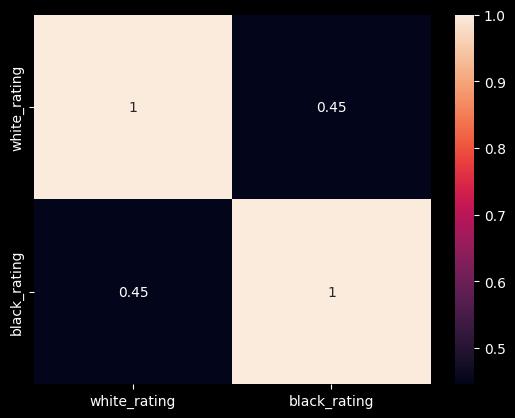

In [48]:
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


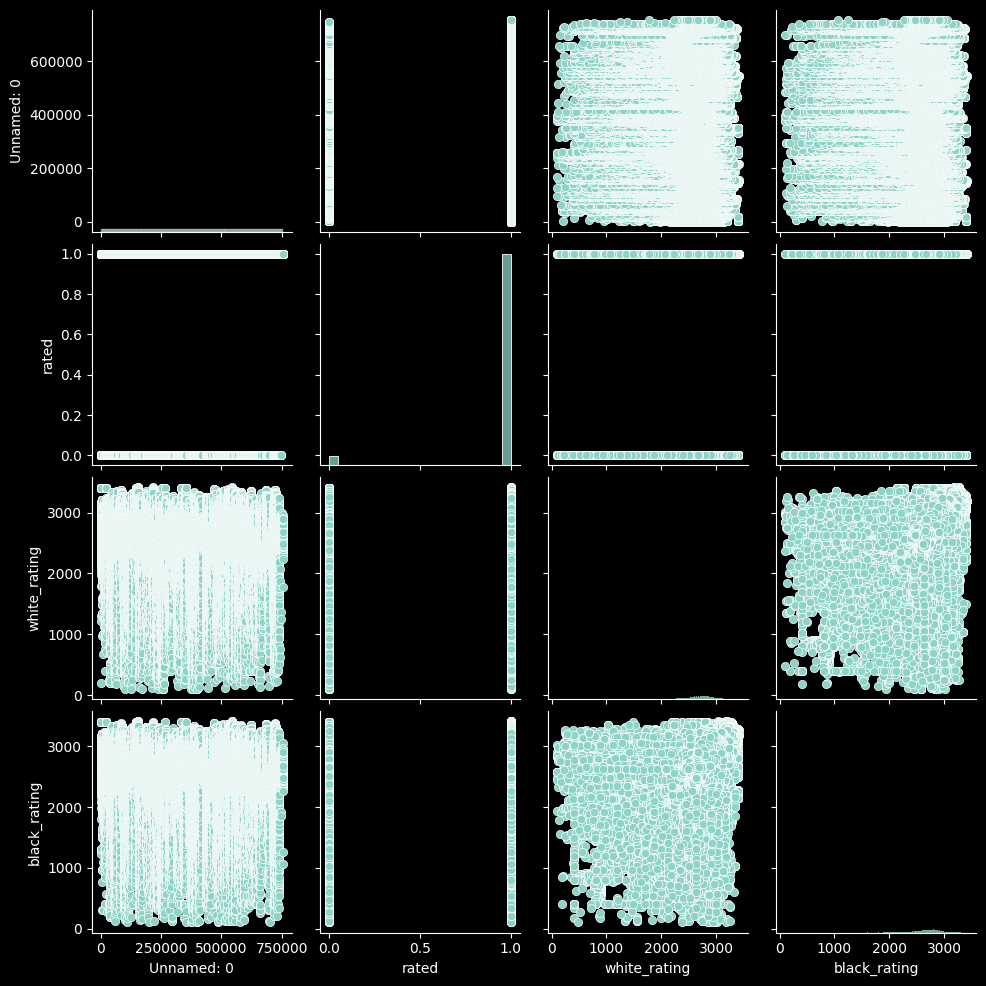

In [49]:
sns.pairplot(df)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


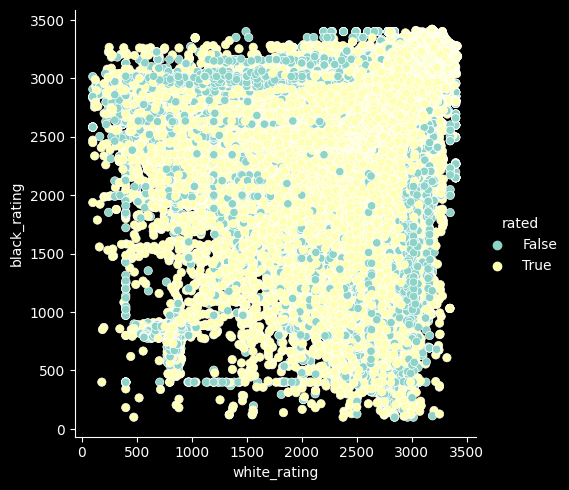

In [52]:
sns.relplot(x= 'white_rating', y='black_rating', hue='rated', data=df)

/tmp/ipykernel_33/3115309374.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['white_rating'], bins=8)


<Axes: xlabel='white_rating', ylabel='Density'>

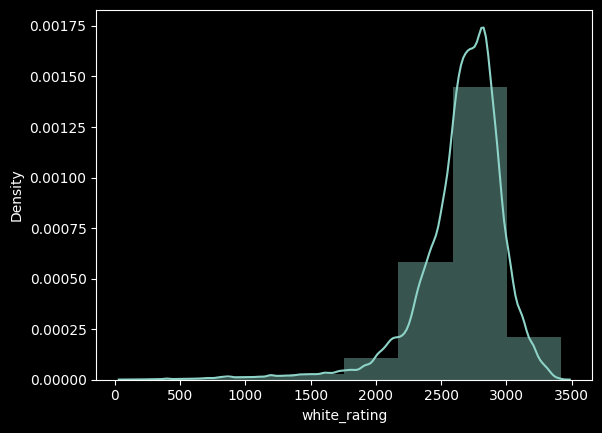

In [59]:
sns.distplot(df['white_rating'], bins=8)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


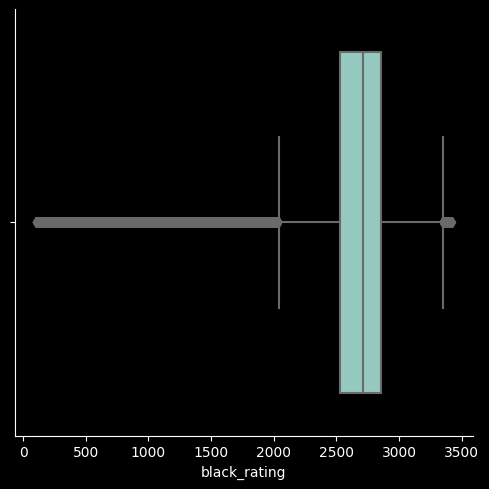

In [60]:
sns.catplot(x='black_rating', kind='box',data=df)

In [1]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x=df.index, y='white_rating')
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined